In [2]:
import json
import scipy.stats as stats

import numpy as np
measurments = json.load(open("param3.json"))



In [3]:
def calculate_quadrant_statistics(entry):
    name, dict1, dict2 = entry


    values1 = []
    values2 = []
    above_count=0
    above_count2=0
    for quadrant in dict1.keys():
        values1.append(dict1[quadrant])
        values2.append(dict2[quadrant])
        if dict1[quadrant] > 10:
            above_count+=1
        if dict2[quadrant] > 10:
            above_count2+=1
        # Calculate the difference between values1 and values2
        

        # Calculate summary statistics for the differences
    mean_occupancy = np.mean(values1)
    std = np.std(values1)


        


    mean_ray_pass = np.mean(values2)
    std_ray_pass = np.std(values2)

    quadrant_statistics2 ={
            'Name': name,
            'Mean_occupancy': mean_occupancy,
            'exceeded_count': above_count,
            'Std_occupancy': std,
            'Mean_pass': mean_ray_pass,
            'exceeded_ray_count': above_count2,
            'Std_pass': std_ray_pass,
        }

    return quadrant_statistics2

# List to store the results
results = []


# Iterate through the data_list and calculate statistics for each name and quadrant
for entry in measurments:
    quadrant_stats = calculate_quadrant_statistics(entry)
    results.append(quadrant_stats)



In [4]:
measurments[np.random.randint(500)]

['C=CCOC(=O)/N=C/c1ccco1',
 {'0': 18.508223658952346,
  '1': 6.933289310011211,
  '2': 0.8070089224012162,
  '3': 2.0804858946204523,
  '4': 1.8151941889214798,
  '5': 4.9084724419122505,
  '6': 3.0226361779566013,
  '7': 0.7870448577176467},
 {'0': 25.0,
  '1': 6.25,
  '2': 0.0,
  '3': 12.5,
  '4': 9.375,
  '5': 9.375,
  '6': 9.375,
  '7': 6.25}]

In [5]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame.from_dict(results, orient='columns')
df = df.reset_index()
df = df.sort_values(by='Mean_occupancy', ascending=True)

df['Count'] = df.groupby('Name')['Mean_occupancy'].transform('count')

df = df.sort_values(by='Mean_occupancy', ascending=True)

#fig = px.bar(df, x='index', y='Mean Difference',  error_y='Std Deviation of Difference',title='Mean Values with Standard Deviations')
fig = px.bar(df, y='exceeded_ray_count',title='Mean Values with Standard Deviations')

fig.update_traces(marker_color='royalblue', marker_line_color='black', marker_line_width=1, opacity=0.7)
fig.update_layout(yaxis_title='Mean Value', showlegend=False)  # Remove x-axis title

# Adjust the width of the plot (e.g., reduce to 800 pixels)
fig.update_yaxes(range=[0, 8])

fig.update_layout(width=800)
# Show the plot
fig.show()

In [6]:
df_ee = pd.read_csv("../data/processed/mannich_database_processed.csv")

df = pd.DataFrame.from_dict(results, orient='columns')
df = df.reset_index()
df = df.sort_values(by='Mean_occupancy', ascending=True)

CT=pd.DataFrame()
CT["Catalyst_Type"]=df_ee["Catalyst_Type"]
CT["Name"]=df_ee["Imine_SMILES"]
CT=CT.drop_duplicates()
#CT = df_ee.groupby('Name')
df['Count'] = df.groupby('Name')['Mean_occupancy'].transform('count')
average_ee_by_name = df_ee.groupby('Imine_SMILES')['ee'].mean().reset_index()
max_ee_by_name = df_ee.groupby(['Imine_SMILES',"Catalyst_Type"])['ee'].max().reset_index()
max_ee_by_name = max_ee_by_name.loc[max_ee_by_name.groupby('Imine_SMILES')['ee'].idxmax()]

df_ee['yield'] = pd.to_numeric(df_ee['yield'], errors='coerce')
average_yield_by_name = df_ee.groupby('Imine_SMILES')['yield'].mean().reset_index()
max_yield_by_name = df_ee.groupby('Imine_SMILES')['yield'].max().reset_index()

average_ee_by_name = average_ee_by_name.rename(columns={'Imine_SMILES': 'Name'})

max_yield_by_name = max_yield_by_name.rename(columns={'Imine_SMILES': 'Name'})
max_yield_by_name = max_yield_by_name.rename(columns={'yield': 'yield_max'})

max_ee_by_name = max_ee_by_name.rename(columns={'Imine_SMILES': 'Name'})
max_ee_by_name = max_ee_by_name.rename(columns={'ee': 'ee_max'})
average_yield_by_name = average_yield_by_name.rename(columns={'Imine_SMILES': 'Name'})

# Match the 'ee' column with the 'Experiment' column in your DataFrame based on name
df = pd.merge(df, average_ee_by_name, how='left', on='Name')
df = pd.merge(df, average_yield_by_name, how='left', on='Name')
df = pd.merge(df, max_yield_by_name, how='left', on='Name')
df = pd.merge(df, max_ee_by_name, how='left', on='Name')


# Drop the 'Match_Column' if you no longer need it

# Print the resulting DataFrame with the matched 'ee' column
print(df)

     index                                          Name  Mean_occupancy   
0      323                     COc1ccc(/N=C/c2ccncc2)cc1        2.186580  \
1      188                CCOC(=O)c1nc(=O)oc2ccc(OC)cc12        2.603726   
2      186                 CCOC(=O)c1nc(=O)oc2ccc(C)cc12        2.701979   
3      499                   O=C(O)/N=C/Cc1cc(F)c(F)cc1F        2.772030   
4       46                           CC(=O)/N=C/C(F)(F)F        2.834465   
..     ...                                           ...             ...   
548    290  COc1ccc(/N=C/[C@@H]2CCCN2C(=O)OCc2ccccc2)cc1       12.275980   
549    165                    CCCCCCCCC/C=N/c1ccc(OC)cc1       12.429118   
550    395         Cc1ccc(/C=N/c2nc(C)cc(N3CCCCC3)n2)cc1       12.430366   
551    412  Cc1ccc(S(=O)(=O)/N=C/c2ccc(-c3ccccc3)cc2)cc1       12.449130   
552    273        COc1ccc(/C=N/c2nc(C)cc(N3CCCCC3)n2)cc1       12.488578   

     exceeded_count  Std_occupancy  Mean_pass  exceeded_ray_count   Std_pass   
0      

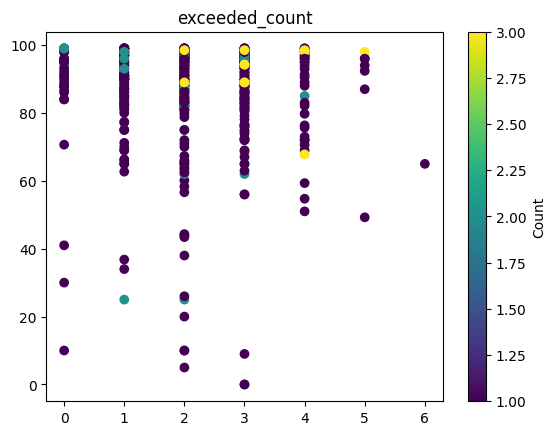

In [7]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('viridis')

# Scatter plot between 'ee' and 'Mean Difference'
scatter =plt.scatter( df['exceeded_count'], df['ee'],c=df['Count'], cmap=cmap)

plt.title('exceeded_count')
cbar = plt.colorbar(scatter, label='Count')

# Show the plot
plt.show()

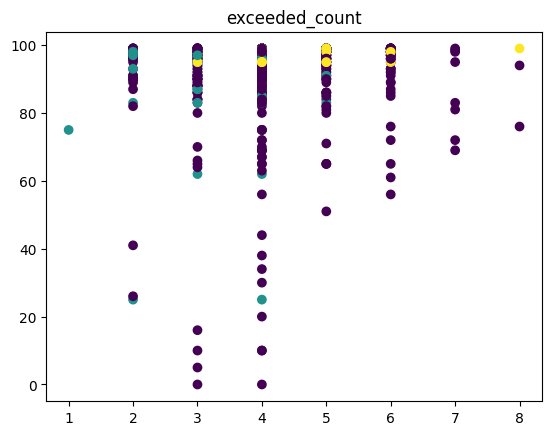

In [8]:
plt.scatter( df['exceeded_ray_count'], df['ee_max'],c=df['Count'], cmap=cmap)

plt.title('exceeded_count')

# Show the plot
plt.show()

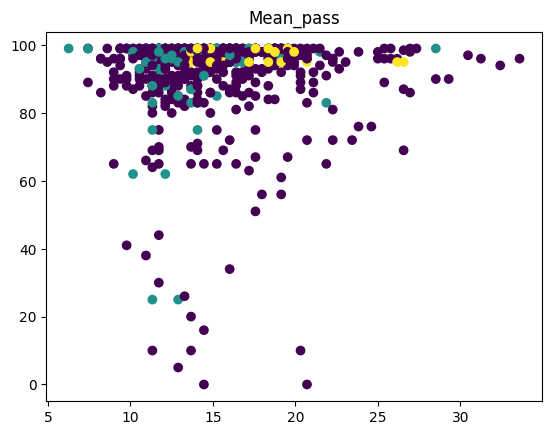

In [9]:
plt.scatter( df['Mean_pass'], df['ee_max'],c=df['Count'], cmap=cmap)

plt.title('Mean_pass')

# Show the plot
plt.show()

/var/folders/bg/0172ww9j3x9_mqwpf6wh9jj80000gn/T/ipykernel_72429/717460930.py:1: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



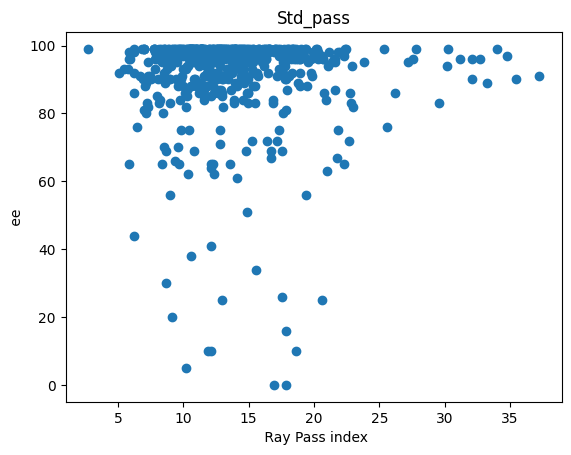

In [29]:
plt.scatter( df['Std_pass'], df['ee_max'], cmap=cmap)

plt.title('Std_pass')
plt.xlabel(" Ray Pass index")
plt.ylabel(" ee ")
# Show the plot
plt.show()

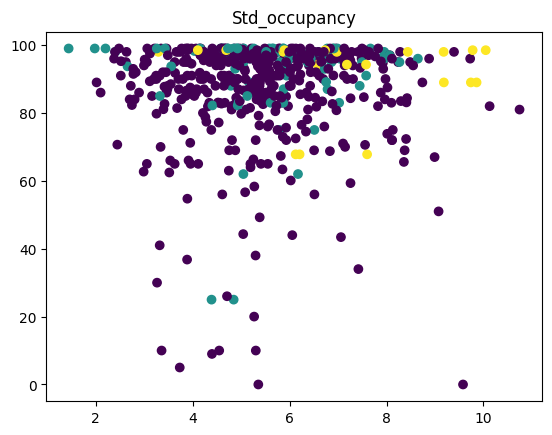

In [11]:
plt.scatter( df['Std_occupancy'], df['ee'],c=df['Count'], cmap=cmap)

plt.title('Std_occupancy')

# Show the plot
plt.show()

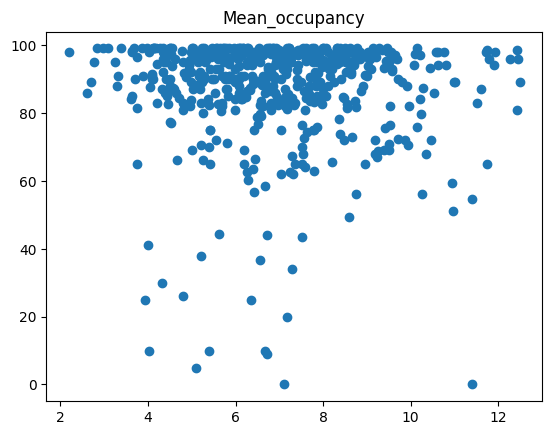

In [12]:
plt.scatter( df['Mean_occupancy'], df['ee'])

plt.title('Mean_occupancy')

# Show the plot
plt.show()

In [13]:
import plotly.express as px

fig=px.scatter( df, x="Std_pass", y="ee_max", color=df['Catalyst_Type'])


# Show the plot
fig.show()

In [14]:
len(df.loc[df["Mean_pass"]>20])*0.04
#len(df.loc[df["ee"]<50])/550

2.56

# RISK - GENERALITY

In [15]:

# Calculate VAR
confidence_level = 0.95  # 95% confidence level
var = np.percentile(df['ee']/100,  100*(1 - confidence_level))
print(f'Value at Risk (VAR) at {confidence_level * 100}% confidence level: {var:.2%}')

# Calculate ES
tail_losses = df['ee'][df['ee']/100 < var]
tail_losses=tail_losses/100
es = tail_losses.mean()
print(f'Expected Shortfall (ES) at {confidence_level * 100}% confidence level: {es:.2%}')

Value at Risk (VAR) at 95.0% confidence level: 61.24%
Expected Shortfall (ES) at 95.0% confidence level: 34.03%


In [16]:

# Calculate VAR
confidence_level = 0.95  # 95% confidence level
X=df["yield"].dropna()
var = np.percentile(X/100,  100*(1 - confidence_level))
print(f'Value at Risk (VAR) at {confidence_level * 100}% confidence level: {var:.2%}')

# Calculate ES
tail_losses = X[X/100 < var]
tail_losses=tail_losses/100
es = tail_losses.mean()
print(f'Expected Shortfall (ES) at {confidence_level * 100}% confidence level: {es:.2%}')

Value at Risk (VAR) at 95.0% confidence level: 47.73%
Expected Shortfall (ES) at 95.0% confidence level: 38.45%


In [17]:
def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - confidence_level))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby('Catalyst_Type')['ee'].apply(calculate_var_es).reset_index()

fig = px.bar(results, x='Catalyst_Type', y='ee', title='VAR and ES by Asset Type',
             labels={'variable': 'Metric', 'value': 'Value'}, barmode='group',color='level_1')

# Customize the layout
fig.update_layout(xaxis_title='Asset Type', yaxis_title='Value', legend_title=None, xaxis_tickangle=-4
                  )

# Show the plot
fig.show()

In [18]:
fig3 = px.histogram(df_ee, x='ee', color='Catalyst_Type', facet_col='Catalyst_Type',
                     title='Return Distribution by Asset Type')
fig3.show()


In [19]:

df_ee["rank"] = df_ee.groupby("Reaction")["ee"].rank(method="dense", ascending=False)

mean_rank = df_ee.groupby(['Catalyst_Type'])['rank'].mean()
print(mean_rank)

fig = px.bar(x=mean_rank.index, y=mean_rank,
                labels={'x':'Catalyst Class', 'y':'Rank Gen'},
                template='simple_white',
                width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.show()


Catalyst_Type
(Thio)Urea           3.172269
BA                   3.352227
Cinchona Alkaloid    2.912621
Misc                 3.866197
Primary Amine        3.085366
Secondary Amine      3.295359
Squaramide           2.890511
Name: rank, dtype: float64


In [20]:
pivoted_df = results.pivot(index='Catalyst_Type', columns='level_1', values='ee').reset_index()
import plotly.graph_objects as go

# Merge the 'rank' DataFrame based on 'type'
merged_df = pd.merge(pivoted_df, mean_rank, on='Catalyst_Type')

# Rename columns to match the desired structure
merged_df.rename(columns={'VAR': 'VAR', 'ES': 'ES', 'rank': 'rank'}, inplace=True)

# Fill NaN values in the 'Rank' column with 0 if needed
merged_df['rank'].fillna(0, inplace=True)
merged_df['rank']=merged_df['rank']*10
fig = go.Figure()

for col in ['VAR', 'ES', 'rank']:
    fig.add_trace(go.Bar(
        x=merged_df['Catalyst_Type'],
        y=merged_df[col],
        name=col
    ))
# Show the plot
fig.show()

In [21]:
print(merged_df.sort_values('VAR', ascending=False)["Catalyst_Type"])
print(merged_df.sort_values('ES', ascending=False)["Catalyst_Type"])
print(merged_df.sort_values('rank', ascending=True)["Catalyst_Type"])



6           Squaramide
3                 Misc
5      Secondary Amine
1                   BA
0           (Thio)Urea
4        Primary Amine
2    Cinchona Alkaloid
Name: Catalyst_Type, dtype: object
6           Squaramide
3                 Misc
1                   BA
4        Primary Amine
5      Secondary Amine
0           (Thio)Urea
2    Cinchona Alkaloid
Name: Catalyst_Type, dtype: object
6           Squaramide
2    Cinchona Alkaloid
4        Primary Amine
0           (Thio)Urea
5      Secondary Amine
1                   BA
3                 Misc
Name: Catalyst_Type, dtype: object


In [22]:
df_ee['Count'] = df_ee.groupby('Reaction')["ee"].transform('count')
df_ee['weighted_rank'] = df_ee["rank"]/df_ee['Count'] 
mean_rankw = df_ee.groupby(['Catalyst_Type'])['weighted_rank'].mean()
mean_rank = df_ee.groupby(['Catalyst_Type'])['rank'].mean()

merged_df = pd.merge(mean_rankw, mean_rank, on='Catalyst_Type')

print(mean_rank)
fig = go.Figure()

for col in [ 'weighted_rank', 'rank']:
    fig.add_trace(go.Bar(
        x=merged_df.index,
        y=merged_df[col],
        name=col
    ))
# Show the plot
fig.show()
print(merged_df.sort_values('weighted_rank', ascending=True))
print(merged_df.sort_values('rank', ascending=True))

Catalyst_Type
(Thio)Urea           3.172269
BA                   3.352227
Cinchona Alkaloid    2.912621
Misc                 3.866197
Primary Amine        3.085366
Secondary Amine      3.295359
Squaramide           2.890511
Name: rank, dtype: float64


                   weighted_rank      rank
Catalyst_Type                             
Secondary Amine         0.451234  3.295359
Misc                    0.508773  3.866197
Primary Amine           0.577232  3.085366
Squaramide              0.613808  2.890511
(Thio)Urea              0.698252  3.172269
BA                      0.725549  3.352227
Cinchona Alkaloid       0.748014  2.912621
                   weighted_rank      rank
Catalyst_Type                             
Squaramide              0.613808  2.890511
Cinchona Alkaloid       0.748014  2.912621
Primary Amine           0.577232  3.085366
(Thio)Urea              0.698252  3.172269
Secondary Amine         0.451234  3.295359
BA                      0.725549  3.352227
Misc                    0.508773  3.866197


In [23]:
sdf = df_ee.loc[df_ee["Count"]==1]
sdf.groupby(['Catalyst_Type']).describe()/len(sdf)

Unnamed: 0                                           
                       count      mean       std       min       25%   
Catalyst_Type                                                          
(Thio)Urea          0.296468  1.695502  0.495774  0.570632  1.447491  \
BA                  0.118959  1.614806  0.808510  0.760223  0.812965   
Cinchona Alkaloid   0.205390  1.531615  0.690793  0.541822  1.197955   
Misc                0.041822  1.559190  0.404778  1.337361  1.355019   
Primary Amine       0.052974  1.607530  1.017067  0.207249  0.528810   
Secondary Amine     0.172862  0.918296  0.655926  0.015799  0.261385   
Squaramide          0.111524  2.145299  0.063604  2.039033  2.095493   

                                                     Temp            ...   
                        50%       75%       max     count      mean  ...   
Catalyst_Type                                                        ...   
(Thio)Urea         1.750929  1.888941  2.662639  0.296468 -0.006992  ...  \
BA                 1.654740  2.457481  2.503717  0.118959 -0.001547  ...   
Cinchona Alkaloid  1.265799  1.956320  2.636617  0.205390 -0.018819  ...   
Misc               1.365242  1.522305  2.566914  0.041822 -0.009294  ...   
Primary Amine      1.612454  2.682156  2.695167  0.052974  0.032169  ...   
Secondary Amine    0.921468  1.372444  2.318773  0.172862  0.012032  ...   
Squaramide         2.157528  2.201905  2.264870  0.111524  0.020214  ...   

                      Count           weighted_rank                            
                        75%       max         count      mean  std       min   
Catalyst_Type                                                                  
(Thio)Urea         0.000929  0.000929      0.296468  0.000929  0.0  0.000929  \
BA                 0.000929  0.000929      0.118959  0.000929  0.0  0.000929   
Cinchona Alkaloid  0.000929  0.000929      0.205390  0.000929  0.0  0.000929   
Misc               0.000929  0.000929      0.041822  0.000929  0.0  0.000929   
Primary Amine      0.000929  0.000929      0.052974  0.000929  0.0  0.000929   
Secondary Amine    0.000929  0.000929      0.172862  0.000929  0.0  0.000929   
Squaramide         0.000929  0.000929      0.111524  0.000929  0.0  0.000929   

                                                           
                        25%       50%       75%       max  
Catalyst_Type                                              
(Thio)Urea         0.000929  0.000929  0.000929  0.000929  
BA                 0.000929  0.000929  0.000929  0.000929  
Cinchona Alkaloid  0.000929  0.000929  0.000929  0.000929  
Misc               0.000929  0.000929  0.000929  0.000929  
Primary Amine      0.000929  0.000929  0.000929  0.000929  
Secondary Amine    0.000929  0.000929  0.000929  0.000929  
Squaramide         0.000929  0.000929  0.000929  0.000929  

[7 rows x 64 columns]

In [24]:
df_ee.groupby(['Catalyst_Type']).describe()/len(df_ee)

Unnamed: 0                                           
                       count      mean       std       min       25%   
Catalyst_Type                                                          
(Thio)Urea          0.246122  0.602847  0.216070  0.211306  0.525767  \
BA                  0.085143  0.592080  0.298446  0.279903  0.301103   
Cinchona Alkaloid   0.142020  0.601767  0.262090  0.198897  0.444588   
Misc                0.048949  0.635740  0.170182  0.494312  0.506463   
Primary Amine       0.056532  0.397165  0.344623  0.069976  0.177094   
Secondary Amine     0.326784  0.264850  0.203987  0.000000  0.090917   
Squaramide          0.094450  0.798933  0.033296  0.634609  0.774991   

                                                     Temp            ...   
                        50%       75%       max     count      mean  ...   
Catalyst_Type                                                        ...   
(Thio)Urea         0.647535  0.733109  0.987590  0.246122  0.000407  ...  \
BA                 0.322303  0.907446  0.928645  0.085143 -0.000730  ...   
Cinchona Alkaloid  0.576181  0.930455  0.977939  0.142020 -0.003796  ...   
Misc               0.564116  0.591089  0.952085  0.048949 -0.000391  ...   
Primary Amine      0.192003  0.597122  0.999655  0.056532  0.008914  ...   
Secondary Amine    0.190969  0.406498  0.860048  0.325405  0.004874  ...   
Squaramide         0.799552  0.823768  0.978628  0.094450  0.007256  ...   

                      Count           weighted_rank                       
                        75%       max         count      mean       std   
Catalyst_Type                                                             
(Thio)Urea         0.004826  0.010686      0.246122  0.000241  0.000118  \
BA                 0.004826  0.009652      0.085143  0.000250  0.000117   
Cinchona Alkaloid  0.004481  0.008618      0.142020  0.000258  0.000113   
Misc               0.007584  0.030334      0.048949  0.000175  0.000137   
Primary Amine      0.004481  0.030334      0.056532  0.000199  0.000137   
Secondary Amine    0.006377  0.030334      0.326784  0.000156  0.000124   
Squaramide         0.008273  0.010686      0.094450  0.000212  0.000136   

                                                                     
                        min       25%       50%       75%       max  
Catalyst_Type                                                        
(Thio)Urea         0.000011  0.000142  0.000306  0.000345  0.000345  
BA                 0.000016  0.000158  0.000345  0.000345  0.000345  
Cinchona Alkaloid  0.000016  0.000172  0.000345  0.000345  0.000345  
Misc               0.000004  0.000029  0.000165  0.000345  0.000345  
Primary Amine      0.000004  0.000049  0.000217  0.000345  0.000345  
Secondary Amine    0.000004  0.000043  0.000115  0.000277  0.000345  
Squaramide         0.000014  0.000057  0.000195  0.000345  0.000345  

[7 rows x 64 columns]

In [25]:
df_ee['Count'] = df_ee.groupby('Reaction')["ee"].transform('count')
sdf = df_ee.loc[df_ee["Count"]>=3]
sdf["rank"] = sdf.groupby("Reaction")["ee"].rank(method="dense", ascending=False)

sdf['weighted_rank'] = sdf["rank"]/sdf['Count'] 
mean_rankw = sdf.groupby(['Catalyst_Type'])['weighted_rank'].mean()
mean_rank = sdf.groupby(['Catalyst_Type'])['rank'].mean()

merged_df = pd.merge(mean_rankw, mean_rank, on='Catalyst_Type')

print(mean_rank)
fig = go.Figure()

for col in [ 'weighted_rank', 'rank']:
    fig.add_trace(go.Bar(
        x=merged_df.index,
        y=merged_df[col],
        name=col
    ))
# Show the plot
fig.show()
print(merged_df.sort_values('weighted_rank', ascending=True))
print(merged_df.sort_values('rank', ascending=True))
results = sdf.groupby('Catalyst_Type')['ee'].apply(calculate_var_es).reset_index()

fig = px.bar(results, x='Catalyst_Type', y='ee', title='VAR and ES by Asset Type',
             labels={'variable': 'Metric', 'value': 'Value'}, barmode='group',color='level_1')

# Customize the layout
fig.update_layout(xaxis_title='Asset Type', yaxis_title='Value', legend_title=None, xaxis_tickangle=-4
                  )

# Show the plot
fig.show()

Catalyst_Type
(Thio)Urea           5.508876
BA                   6.683168
Cinchona Alkaloid    5.591716
Misc                 5.655172
Primary Amine        4.438776
Secondary Amine      4.257576
Squaramide           5.007937
Name: rank, dtype: float64


/var/folders/bg/0172ww9j3x9_mqwpf6wh9jj80000gn/T/ipykernel_72429/3024108349.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bg/0172ww9j3x9_mqwpf6wh9jj80000gn/T/ipykernel_72429/3024108349.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                   weighted_rank      rank
Catalyst_Type                             
Squaramide              0.219708  5.007937
Misc                    0.244204  5.655172
Secondary Amine         0.269348  4.257576
Primary Amine           0.312919  4.438776
BA                      0.383273  6.683168
(Thio)Urea              0.406958  5.508876
Cinchona Alkaloid       0.415278  5.591716
                   weighted_rank      rank
Catalyst_Type                             
Secondary Amine         0.269348  4.257576
Primary Amine           0.312919  4.438776
Squaramide              0.219708  5.007937
(Thio)Urea              0.406958  5.508876
Cinchona Alkaloid       0.415278  5.591716
Misc                    0.244204  5.655172
BA                      0.383273  6.683168


In [26]:
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
groups = [group['ee'] for name, group in df_ee.groupby('Catalyst_Type')]
print(groups)
# Perform Kruskal-Wallis test to compare multiple groups
statistic, p_value = kruskal(*groups)


print("Kruskal-Wallis test:")
print(f"Statistic: {statistic}, p-value: {p_value}")

if p_value < 0.05:
    print("Significant differences exist.")
else:
    print("No significant differences.")

[613     92.0
614     86.0
615     90.0
616     90.0
617     94.0
        ... 
2861    82.0
2862    56.0
2863    72.0
2864    67.0
2865    75.0
Name: ee, Length: 714, dtype: float64, 812      0.0
813     27.0
814     60.0
815     52.0
816     87.0
        ... 
2690    96.0
2691    98.0
2692    94.0
2693    98.0
2694    96.0
Name: ee, Length: 247, dtype: float64, 577     90.0
578     88.0
579     18.0
580     88.0
581     10.0
        ... 
2833    72.0
2834    80.0
2835    80.0
2836    62.0
2837    50.0
Name: ee, Length: 412, dtype: float64, 1434    68.0
1435    46.0
1436    61.0
1437    82.0
1438    89.0
        ... 
2758    93.0
2759    98.0
2760    80.0
2761    60.0
2762    99.0
Name: ee, Length: 142, dtype: float64, 203     94.0
204     98.0
205     90.0
206     99.0
207     86.0
        ... 
2896    99.0
2897    99.0
2898    99.0
2899    99.0
2900    99.0
Name: ee, Length: 164, dtype: float64, 0       94.0
1       96.0
2       93.0
3       91.0
4       73.0
        ... 
2491    98.

In [27]:
average_ee_by_reaction = df_ee.groupby(['Reaction'])['ee'].mean().reset_index()
average_ee_by_reaction = average_ee_by_reaction.rename(columns={'ee': 'ee_react_avg'})

sdf = pd.merge(df_ee, average_ee_by_reaction, how='left', on='Reaction')
sdf = sdf.loc[sdf["ee_react_avg"]<90]
sdf["rank"] = sdf.groupby("Reaction")["ee"].rank(method="dense", ascending=False)

sdf['weighted_rank'] = sdf["rank"]/sdf['Count'] 
mean_rankw = sdf.groupby(['Catalyst_Type'])['weighted_rank'].mean()
mean_rank = sdf.groupby(['Catalyst_Type'])['rank'].mean()

merged_df = pd.merge(mean_rankw, mean_rank, on='Catalyst_Type')

fig = go.Figure()

for col in [ 'weighted_rank', 'rank']:
    fig.add_trace(go.Bar(
        x=merged_df.index,
        y=merged_df[col],
        name=col
    ))
# Show the plot
fig.show()
print(merged_df.sort_values('weighted_rank', ascending=True))
print(merged_df.sort_values('rank', ascending=True))
results = sdf.groupby('Catalyst_Type')['ee'].apply(calculate_var_es).reset_index()

fig = px.bar(results, x='Catalyst_Type', y='ee', title='VAR and ES by Asset Type',
             labels={'variable': 'Metric', 'value': 'Value'}, barmode='group',color='level_1')

# Customize the layout
fig.update_layout(xaxis_title='Asset Type', yaxis_title='Value', legend_title=None, xaxis_tickangle=-4
                  )

# Show the plot
fig.show()

                   weighted_rank      rank
Catalyst_Type                             
Misc                    0.361117  6.805970
Secondary Amine         0.381832  4.986486
Primary Amine           0.396937  4.206186
Squaramide              0.539489  4.776699
BA                      0.604797  4.420118
(Thio)Urea              0.605134  4.280742
Cinchona Alkaloid       0.624462  4.110638
                   weighted_rank      rank
Catalyst_Type                             
Cinchona Alkaloid       0.624462  4.110638
Primary Amine           0.396937  4.206186
(Thio)Urea              0.605134  4.280742
BA                      0.604797  4.420118
Squaramide              0.539489  4.776699
Secondary Amine         0.381832  4.986486
Misc                    0.361117  6.805970
